In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import pickle

from utils import downloadData
from utils import dataProc

In [82]:
read = 1
if read:
    data = dataProc.dataProc()
    df = data.loadData()
    df_dict = data.cleanData(df)
    with open('df_dict.pickle', 'wb') as handle:
        pickle.dump(df_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('df_dict.pickle', 'rb') as handle:
    df_dict = pickle.load(handle)

list files
['./data\\2013.xlsx', './data\\2014.xlsx', './data\\2015.xlsx', './data\\2016.xlsx', './data\\2017.xlsx', './data\\2018.xlsx', './data\\2019.xlsx', './data\\2020abr.xlsx', './data\\2020ago.xlsx', './data\\2020ene.xlsx', './data\\2020jul.xlsx', './data\\2020jun.xlsx', './data\\2020mar.xlsx', './data\\2020may.xlsx']
years files
[WindowsPath('2013.xlsx'), WindowsPath('2014.xlsx'), WindowsPath('2015.xlsx'), WindowsPath('2016.xlsx'), WindowsPath('2017.xlsx'), WindowsPath('2018.xlsx'), WindowsPath('2019.xlsx'), WindowsPath('2020ago.xlsx')]
Loading data
Loading data finished
Cleanning data
Cleaning data finsihed


In [83]:
for i in df_dict.keys():
    df_dict[i]=df_dict[i].dropna(axis=1, thresh=5) #delete rows with just nan values
    df_dict[i].columns = df_dict[i].columns.str.replace(' ', '') 

In [85]:
#extract all information in a single df? At least production? 
df = {}
for i in df_dict.keys():
    df_temp = df_dict[i].groupby('campo').sum() # Grouping as needed
    January =  df_temp.columns.get_loc('enero')# picking the group first month location
    df[i] = df_temp.iloc[:, January::]# Assign clean table
    print("\n",i,"\n")
    print(df[i].head())


 2013 

0                  enero      febrero        marzo        abril         mayo  \
campo                                                                          
abanico      1220.709677  1258.892857  1248.903226  1220.833333  1194.677419   
abarco       5027.193548  5051.250000  5700.419355  5654.400000  5240.032258   
abedus          0.000000     0.000000     0.000000    33.666667     3.903226   
abejas        233.806452   307.928571   262.967742   265.933333   271.483871   
acacia este     0.000000     0.000000     3.516129     4.366667     4.645161   

0                  junio        julio       agosto   septiembre      octubre  \
campo                                                                          
abanico      1112.800000  1014.354839   995.258065  1014.600000  1142.322581   
abarco       5066.300000  5580.645161  5647.935484  5562.066667  5959.612903   
abedus          0.233333     5.064516    19.000000     0.000000     0.000000   
abejas        276.533333   278

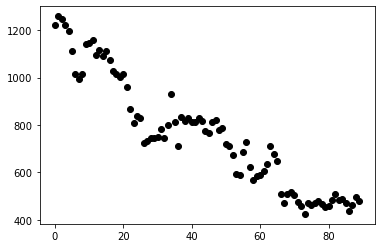

In [96]:
campo = "abanico"
production = np.array([])
for i in df.keys():
    production = np.append(production, df[i].loc[campo,:])

fig = plt.figure()
ax = plt.axes()
x_temp = np.arange(0,production.size)
ax.plot(x_temp, production,'o', color = 'black')